In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


## 1. Bifurcation map

In [13]:
# Definition of bifurcation function

def bifurcation(x, r):
    return(r * (1 - x) * x)

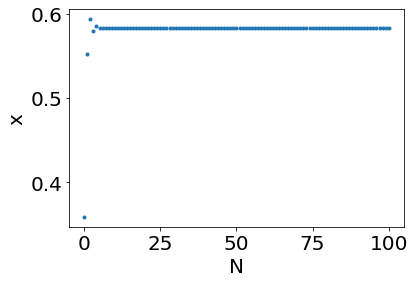

In [14]:
# Test for one particular r

Range = 101
r = 2.4
X = []
x = np.random.rand()

for n in range(Range):
    x = bifurcation(x, r)
    X.append(x)
plt.plot(range(Range), X, '.')
plt.xlabel('N')
plt.ylabel('x')
plt.show() 

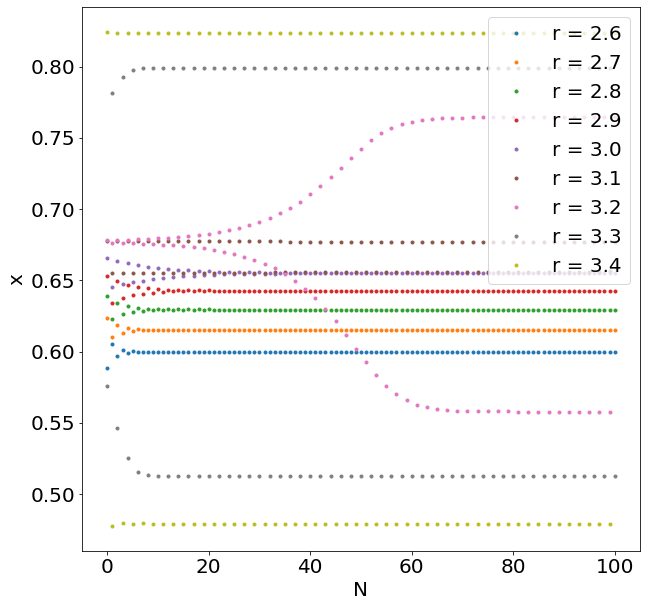

In [15]:
# As we can see, with r-value between 2 and 3 everything is diverges (so we kind of played with r)

plt.figure(figsize=(10,10))
Range = 101
r = 2.5
x = np.random.rand()

for i in range(9):
    X = []
    for n in range(Range):
        x = bifurcation(x, r)
        X.append(x)
    r = r + 0.1
    plt.plot(range(Range), X, '.', label = 'r = %.1f' % r)


plt.legend(loc='best')
plt.xlabel('N')
plt.ylabel('x')
plt.show() 

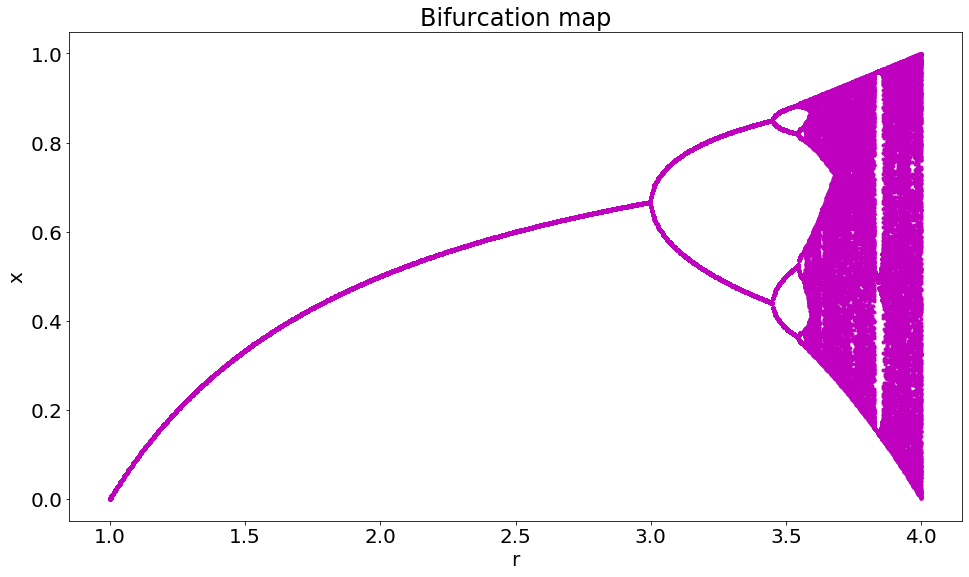

In [16]:
# Here we can observe bifurcation with 200 elements of our X_n left
Range = 1001
plt.figure(figsize = (16,9))
r = np.linspace(1,4,Range)
X =[]
x = np.random.rand()*np.ones(Range)
m = 200

for n in range(Range):
    x = bifurcation(x, r)
    if n > (Range - m): plt.plot(r, x, 'm.') # restriction for last 200 elements and plotting

plt.title('Bifurcation map')
plt.xlabel('r')
plt.ylabel('x')
plt.show()    

## 2. Julia set

In [2]:
# Definition of Julia's sequence function

def Julia(z, c):
    return(z**2 + c)

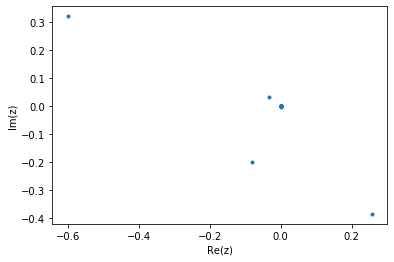

In [3]:
# For rather random z_0 and c = 0 we can briefly look on what we'll work with

z = 0.2 + 0.8j
Range = 1000
c = 0
Z_real = []
Z_imag = []


for n in range(Range):
    z = Julia(z, c)
    Z_real.append(z.real)
    Z_imag.append(z.imag)
            
plt.plot(Z_real, Z_imag, '.')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show() 

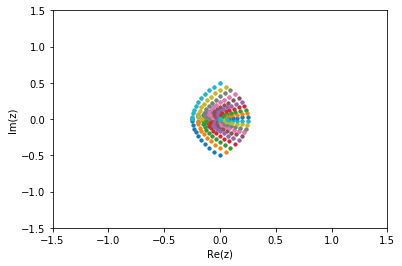

In [4]:
Range = 100 # toy-example before real fractal plotting
c = 0

re = np.linspace(-0.5, 0.5, 20)
im = np.linspace(-0.5, 0.5, 20)

for i in re: # changing Re(z_0) and Im(z_0) in some reasonable limits
    for j in im:
        if (i**2 + j**2 + c > 10): break # or our algorithm will quickly break since |z| will grow fast (~exp)
        z = complex(i,j)
        Z_real = []
        Z_imag = []
        for n in range(Range):
            z = Julia(z, c)
            Z_real.append(z.real)
            Z_imag.append(z.imag)
        plt.plot(Z_real, Z_imag, '.')
        
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
#plt.legend(loc='best')
plt.show()

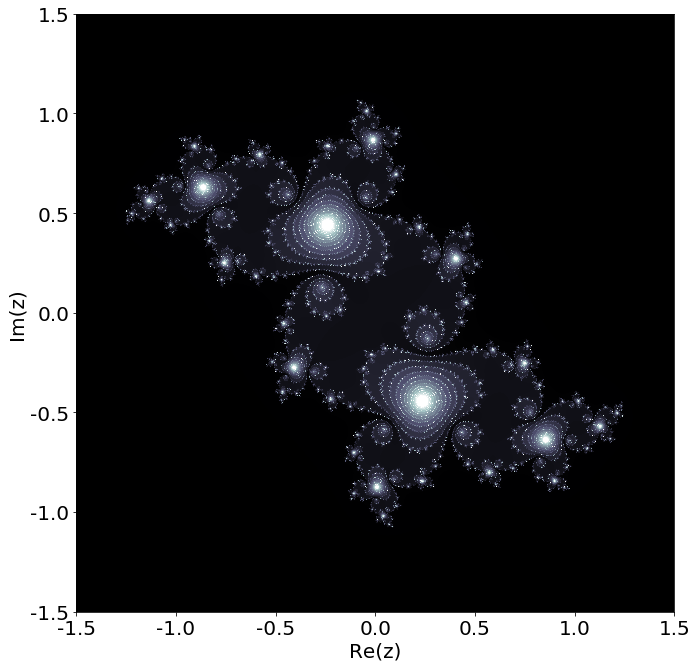

In [5]:
Range = 1000
c = complex(-0.1, 0.651) # examples straight from wikipedia
#c = complex(-0.7454, 0.11301)
z_max = 2 
x_lim = 600; y_lim = 600
Re_min = -1.5; Re_max = 1.5 # Limits as in wikipedia and presentation
Im_min = -1.5; Im_max = 1.5
re = np.linspace(Re_min, Re_max, x_lim)
im = np.linspace(Im_min, Im_max, y_lim)
fract = np.zeros((x_lim, y_lim))

for i in range(x_lim):
    for j in range(y_lim):
#        z = complex(re[i],im[j])
        z = complex(re[j],im[i])
        for n in range(Range): # inner cycle
            if abs(z) > z_max: break; # since z is growing really fast, we will manually "cut" abs(z)
            z = Julia(z,c) 
        fract[i,j] = n/Range # our dots will have different color depending on number of "convergence" iterations 

plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
plt.imshow(fract, cmap='bone') # imshow for 2D-grafics 
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')

plt.xlim(0 ,x_lim)
plt.ylim(0 ,y_lim)
plt.xticks(np.arange(0,x_lim+100,100),np.linspace(Re_min,Re_max,7))
plt.yticks(np.arange(0,y_lim+100,100),np.linspace(Im_min,Im_max,7))
plt.show() 

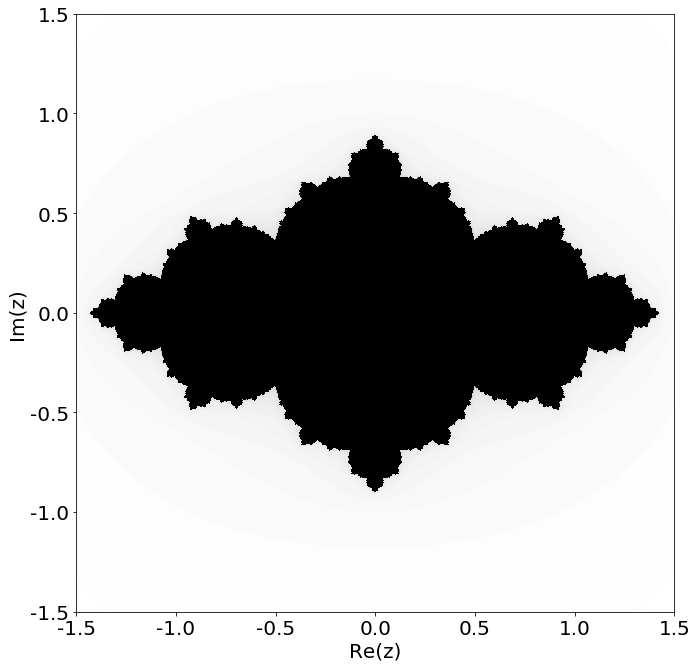

In [25]:
Range = 100
c = complex(-0.1, 0.651) # examples straight from wikipedia
#c = complex(-0.7454, 0.11301)
z_max = 2
x_lim = 600; y_lim = 600
Re_min = -1.5; Re_max = 1.5 # Limits as in wikipedia and presentation
Im_min = -1.5; Im_max = 1.5
re = np.linspace(Re_min, Re_max, x_lim)
im = np.linspace(Im_min, Im_max, y_lim)
fract = np.zeros((x_lim, y_lim))

r = (1+np.sqrt(5))/2
c = complex(1-r, 0)

for i in range(x_lim):
    for j in range(y_lim):
#        z = complex(re[i],im[j])
        z = complex(re[j],im[i])
        for n in range(Range): # inner cycle
            if abs(z) > z_max: break; # since z is growing really fast, we will manually "cut" abs(z)
            z = Julia(z,c) 
        fract[i,j] = n/Range # our dots will have different color depending on number of "convergence" iterations 

plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
plt.imshow(fract, cmap='binary') # imshow for 2D-grafics 
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')

plt.xlim(0 ,x_lim)
plt.ylim(0 ,y_lim)
plt.xticks(np.arange(0,x_lim+100,100),np.linspace(Re_min,Re_max,7))
plt.yticks(np.arange(0,y_lim+100,100),np.linspace(Im_min,Im_max,7))
plt.show() 

### Next is Mandelbrot, that is iterated from $z_0 = 0$ and does not diverge.

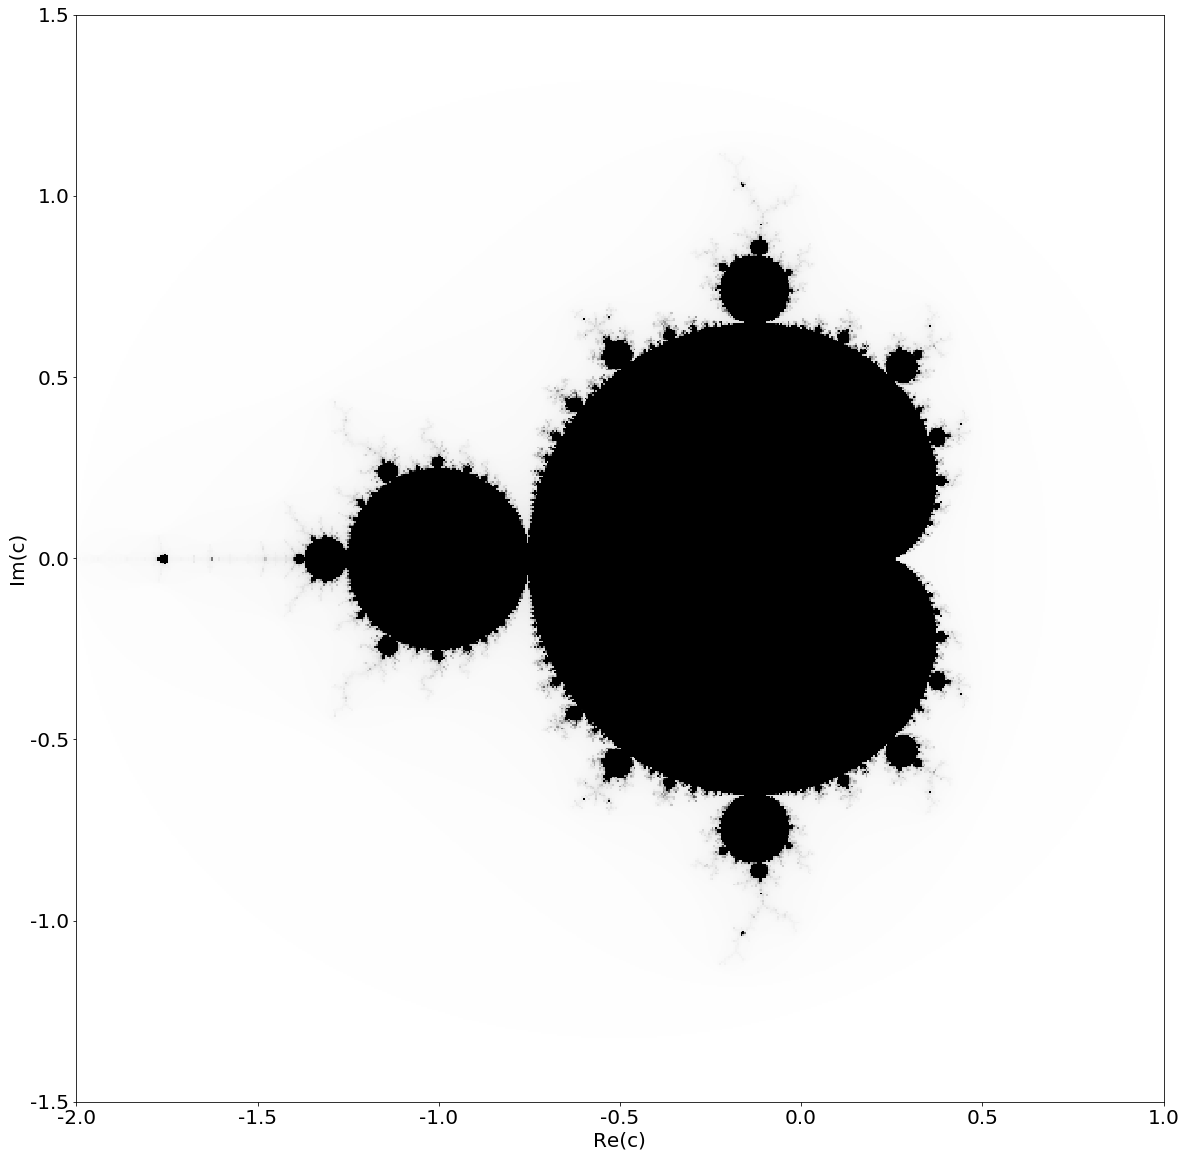

In [12]:
Range = 300
#c = complex(-0.1, 0.651) # examples straight from wikipedia
c = complex(1-(np.sqrt(5))/2, 0)
r = (1+np.sqrt(5))/2
z_max = 2 
x_lim = 600; y_lim = 600
Re_min = -2; Re_max = 1 # Limits as in wikipedia and presentation
Im_min = -1.5; Im_max = 1.5
fract = np.zeros((x_lim, y_lim))
re = np.linspace(Re_min, Re_max, x_lim)
im = np.linspace(Im_min, Im_max, y_lim)
#z_0 = complex(-0.25, 0)
for i in range(x_lim):
    for j in range(y_lim):
        z = 0# starting point for Mandelbrot
        c = complex(re[j],im[i]) # c is given by coordinates (x,y): c = x + iy
        for n in range(Range):
            if abs(z) > z_max: break; # since z is growing really fast, we will manually "cut" abs(z)
            z = Julia(z,c) 
        fract[i,j] = n/Range # our dots will have different color depending on number of "convergence" iterations 

plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
plt.imshow(fract, cmap='binary') # imshow for 2D-grafics 
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')

plt.xlim(0 ,x_lim)
plt.ylim(0 ,y_lim)
plt.xticks(np.arange(0,x_lim+100,100),np.linspace(Re_min,Re_max,7))
plt.yticks(np.arange(0,y_lim+100,100),np.linspace(Im_min,Im_max,7))
plt.show() 

## Animation in python

In [9]:
from math import pi
import imageio

Range = 1000
c = complex(-0.1, 0.651) # examples straight from wikipedia
#c = complex(-0.7454, 0.11301)
z_max = 10 
x_lim = 600; y_lim = 600
Re_min = -1.5; Re_max = 1.5 # Limits as in wikipedia and presentation
Im_min = -1.5; Im_max = 1.5
re = np.linspace(Re_min, Re_max, x_lim)
im = np.linspace(Im_min, Im_max, y_lim)
fract = np.zeros((x_lim, y_lim))
array = []
A = np.linspace(0, 2*pi, 50)

for a in A:
    c = np.exp(1j*a)
    fract = np.zeros((x_lim, y_lim))
    for i in range(x_lim):
        for j in range(y_lim):
            z = complex(re[j],im[i])
            for n in range(Range): # inner cycle
                if abs(z) > z_max: break; # since z is growing really fast, we will manually "cut" abs(z)
                z = Julia(z,c) 
            fract[i,j] = n/Range # our dots will have different color depending on number of "convergence" iterations
    array.append(fract)


KeyboardInterrupt: 

In [ ]:
%matplotlib auto

fig=plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
im=plt.imshow(array[1]) # imshow for 2D-grafics 
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')

plt.xlim(0 ,x_lim)
plt.ylim(0 ,y_lim)
plt.xticks(np.arange(0,x_lim+100,100),np.linspace(Re_min,Re_max,7))
plt.yticks(np.arange(0,y_lim+100,100),np.linspace(Im_min,Im_max,7))


def animate(i): # Animation 
    plt.title('%d', i)
    im.set_data(array[i]) 


ani = animation.FuncAnimation(fig, animate, len(array))
plt.show()

## GIF

In [8]:
from math import pi
import imageio


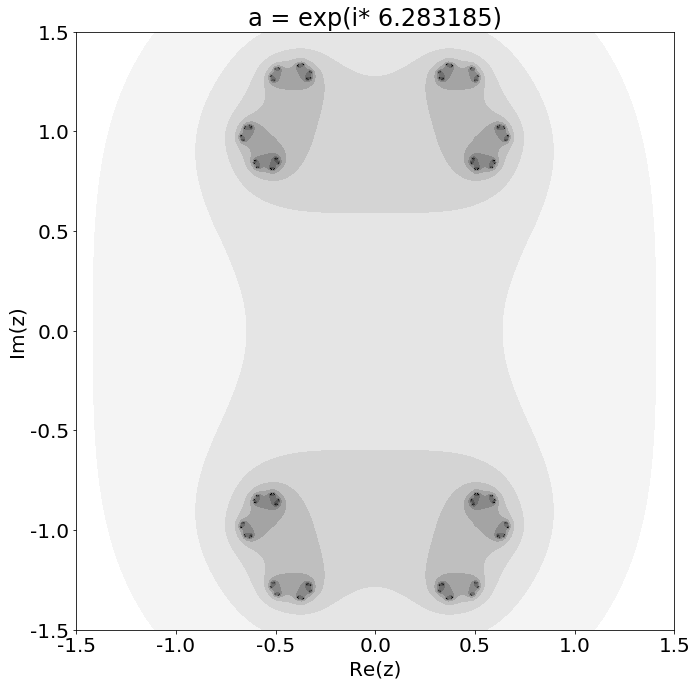

In [19]:
Range = 1000
k=0
c = complex(-0.1, 0.651) # examples straight from wikipedia
#c = complex(-0.7454, 0.11301)
z_max = 10 
x_lim = 600; y_lim = 600
Re_min = -1.5; Re_max = 1.5 # Limits as in wikipedia and presentation
Im_min = -1.5; Im_max = 1.5
re = np.linspace(Re_min, Re_max, x_lim)
im = np.linspace(Im_min, Im_max, y_lim)
fract = np.zeros((x_lim, y_lim))
array = []
n_dots = 60
A = np.linspace(0, 2*pi, n_dots)
plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')

plt.xlim(0 ,x_lim)
plt.ylim(0 ,y_lim)
plt.xticks(np.arange(0,x_lim+100,100),np.linspace(Re_min,Re_max,7))
plt.yticks(np.arange(0,y_lim+100,100),np.linspace(Im_min,Im_max,7))

for a in A:
    k=k+1
    c = np.exp(1j*a)
    fract = np.zeros((x_lim, y_lim))
    for i in range(x_lim):
        for j in range(y_lim):
            z = complex(re[j],im[i])
            for n in range(Range): # inner cycle
                if abs(z) > z_max: break; # since z is growing really fast, we will manually "cut" abs(z)
                z = Julia(z,c) 
            fract[i,j] = n/Range # our dots will have different color depending on number of "convergence" iterations
    plt.title('a = exp(i* %f)' % a)
    plt.imshow(fract, cmap = 'Greys')
    plt.savefig("{k}.jpg".format(k=k))



In [20]:
import imageio

frames_path = "{k}.jpg"
gif_path = "test.gif"
flag = 1
k = 0
with imageio.get_writer(gif_path, mode='I', fps = 10) as writer:
    while k < n_dots:
        writer.append_data(imageio.imread(frames_path.format(k=k+1)))
        k += 1
        if (k == n_dots) & (flag != 10): 
            k = 0
            flag += 1


## Animation

## 3. Schelling's model

In [17]:
def neighbors(pos, i, j): # Pretty easy intuitive model for all 8 neigbours
    n = 0
    
    if pos[(i - 1) % pos.shape[0], j] == 1: # left
        n+=1
    if pos[i, (j - 1) % pos.shape[1]] == 1: # down
        n+=1
    if pos[(i - 1) % pos.shape[0], (j - 1) % pos.shape[1]] == 1: # down-left
        n+=1
    if pos[(i - 1) % pos.shape[0], (j + 1) % pos.shape[1]] == 1: # up-left
        n+=1

    if pos[i, (j + 1) % pos.shape[1]] == 1: # up
        n+=1
    if pos[(i + 1) % pos.shape[0], j] == 1: # right
        n+=1
    if pos[(i + 1) % pos.shape[0], (j - 1) % pos.shape[1]] == 1: # down-right
        n+=1
    if pos[(i + 1) % pos.shape[0], (j + 1) % pos.shape[1]] == 1: # up-right
        n+=1
        
    return n

In [15]:
%matplotlib auto
def unhappy_agents(pos, R):
    mov = np.zeros((pos.shape[0], pos.shape[1]))
    for i in range(pos.shape[0]):
        for j in range(pos.shape[1]):
            if neighbors(pos, i, j) < R and pos[i, j] == 1:
                mov[i, j] = 1
    return mov

N = 150
Range = 100 # How many rounds do we have
k = 0
Rs = [i/8 for i in range(9)]
R_factor = Rs[4]*8 # Number of neighbours to be unhappy enough to move
ratio = 0.5 # Let ratio of black/white houses be "ratio" - should be not that big (or for relatively small R all 
            # black houses will be satisfied with their positions). Default - 0.5

pos = np.zeros((N**2, 1))
pos[:int(np.ceil((1-ratio)*N**2))] = 1
np.random.shuffle(pos)
pos = pos.reshape(N, N)
mov = np.zeros((N, N))

pos_array = []
mov_array = []

for p in range(Range):
    mov = unhappy_agents(pos, R_factor)
    pos_array.append(pos.copy())
    mov_array.append(mov.copy())
    for i in range(mov.shape[0]):
        for j in range(mov.shape[1]):
            if mov[i, j] == 1:
                pos[i, j] = 0
                while k == 0: # Moving all agents
                    i_ = np.random.randint(pos.shape[0])
                    j_ = np.random.randint(pos.shape[1])
                    if pos[i_, j_] == 0:
                        k = 1       
                pos[i_, j_] = 1
                k = 0
                
fig = plt.figure(figsize = (14,11))
plt.rcParams.update({'font.size': 20})
im = plt.imshow(pos, vmin=0, vmax=1, cmap='gist_yarg')
title = plt.title('City map for R = %d' % R_factor)

def animate(i): # Animation 
    im.set_array(pos_array[i]) 

ani = animation.FuncAnimation(fig, animate, len(pos_array))
plt.show()

Using matplotlib backend: Qt5Agg


## 4. Windowed Fourier Transform

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/alexh3/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pi', 're']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0, 0.5, 'signal, arb.units')

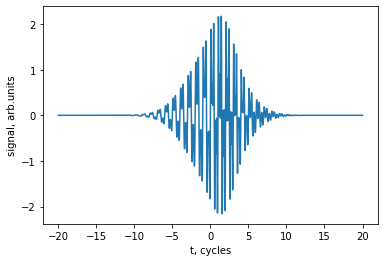

In [27]:
# generate the signal
nofts=1000
t=np.linspace(-20*2*pi, 20*2*pi, 20000)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5)**2/2/20**2)
y=y+np.sin(5*t)*exp(-(t-10)**2/2/10**2)

plt.plot(t/2/pi,y)

xlabel('t, cycles')
ylabel('signal, arb.units')

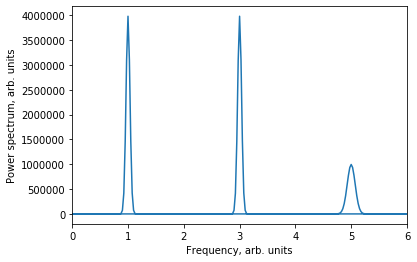

In [28]:
# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plt.plot(w, abs(sp)**2)
xlim(0,6)
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')
plt.show()

Text(0, 0.5, 'signal, arb.units')

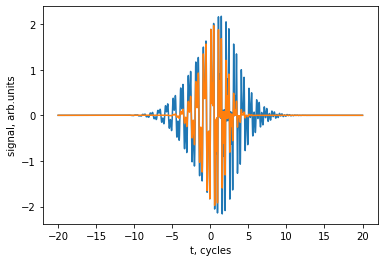

In [29]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2.0*2*pi
window_position=0.0*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y*window_function

plt.plot(t/2/pi, y)
plt.plot(t/2/pi, y_window)

xlabel('t, cycles')
ylabel('signal, arb.units')
# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum

In [30]:
# Just an animation of changing of the result with changing of the window position from 0 to 2pi

%matplotlib auto
fig = plt.figure()
ax = plt.axes(xlim=(-22, 22), ylim=(-2.4, 2.4))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    t=np.linspace(-20*2*pi, 20*2*pi, 20000)
    y=np.sin(t)*exp(-t**2/2/20**2)
    y=y+np.sin(3*t)*exp(-(t-5)**2/2/20**2)
    y=y+np.sin(5*t)*exp(-(t-10)**2/2/10**2)
    window_width=2.0*2*pi
    window_position=i*2*pi/100
    window_function=exp(-(t-window_position)**2/2/window_width**2)
    y_window=y*window_function
    x = t/2/pi
    line.set_data(x, y_window)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=200, interval=20, blit=True)
plt.plot(t/2/pi, y)
plt.title('Animation of window changing')
xlabel('t, cycles')
ylabel('signal, arb.units')
plt.show()

Using matplotlib backend: Qt5Agg


In [31]:
# Fourier spectrum for window transform
sp=fft.fft(y_window)
w=fft.fftfreq(len(y_window), d=(t[1]-t[0])/2/pi)
plt.plot(w, abs(sp)**2)
xlim(0,6)
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')
plt.show()

In [32]:
Range = 1000
TimeRange = 1000
ff = np.zeros((TimeRange, Range))

grid_active = False
fig_x_size = 15
fig_y_size = 10
font_param = 20
title = "Specgram"
xlabel = "t, cycles" 
ylabel = "Frequency, arb. units"



window = np.linspace(-20*pi,20*pi,Range)

t=np.linspace(-20*2*pi, 20*2*pi, TimeRange)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5)**2/2/20**2)
y=y+np.sin(5*t)*exp(-(t-10)**2/2/10**2)
window_width=2.0*2*pi

for i in range(Range):
    window_position=window[i]
    window_function=exp(-(t-window_position)**2/2/window_width**2)
    y_window=y*window_function
    sp_=fft.fft(y_window)
    w_=fft.fftfreq(len(y_window), d=(t[1]-t[0])/2/pi) 
    for j in range(TimeRange):  
        if w_ [j]> 0:
            ff[j, i] = abs(sp_[j])**2
        else: 
            ff[j, i] = 0
    

plt.figure(figsize = (20,20))
# plt.xticks(np.arange(0,Range+1, Range/12),['$-6\pi$','$-5\pi$','$-4\pi$','$-3\pi$','$-2\pi$','$-\pi$','0','$\pi$','$2\pi$','$3\pi$','$4\pi$','$5\pi$','$6\pi$'])
plt.imshow(ff)

plt.xlabel(xlabel, fontsize = font_param)
plt.ylabel(ylabel, fontsize = font_param)
plt.xticks(fontsize = font_param)
plt.yticks(fontsize = font_param)
plt.grid(grid_active)
plt.title('Spectrogram')
plt.ylabel('Frequency')
plt.xlabel('Window size')
plt.ylim(0, 250)
plt.show()
